In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import time

C:\Users\xiang\AppData\Local\Temp\ipykernel_16552\3293030801.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# df = pd.DataFrame(data)
file_path = "../datasets/train_set2.csv"
df = pd.read_csv(file_path)

EMPTYCONST = "*empty*"

# Concatenate relevant text features
catFamily = df["Family"].fillna(EMPTYCONST)
catSubFamily = df["SubFamily"].fillna(EMPTYCONST)
catObjectGroup = df["ObjectGroup"].fillna(EMPTYCONST)
catObjectName = df["ObjectName"].fillna(EMPTYCONST)
catDescription = df["Description"].fillna(EMPTYCONST)
catTypeComments = df["Type Comments"].fillna(EMPTYCONST)
catStructuralMaterial = df["Structural Material"].fillna(EMPTYCONST)
catMaterial = df["Material"].fillna(EMPTYCONST)


df["Features"] = (
    catFamily
    + "|"
    + catSubFamily
    + "|"
    + catObjectGroup
    + "|"
    + catObjectName
    + "|"
    + catDescription
    + "|"
    + catTypeComments
    + "|"
    + catStructuralMaterial
    + "|"
    + catMaterial
)

# Split data into features (X) and target variable (y)
X = df["Features"]
y = df["Category"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Start timing
start_time = time.time()

# Vectorize text data using TF-IDF
vectorizer = CountVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize Random Forest classifier
rf_classifier = XGBClassifier()

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Train the model
rf_classifier.fit(X_train_tfidf, y_train_encoded)

# Make predictions on the test set
predictions = rf_classifier.predict(X_test_tfidf)

# End timing
end_time = time.time()

# Calculate total runtime
total_time = end_time - start_time
print(f"Total runtime: {total_time} seconds")
# Save the trained model to a file
model_filename = "xgboost_cv.pkl"
joblib.dump(rf_classifier, model_filename)

y_test_encoded = label_encoder.transform(y_test)
# Evaluate the model
accuracy = accuracy_score(y_test_encoded, predictions)
print("Accuracy:", accuracy)


# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test_encoded, predictions))

Total runtime: 1.630974531173706 seconds
Accuracy: 0.9792027729636048

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00       126
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           7       1.00      1.00      1.00        66
           8       1.00      0.33      0.50         3
           9       1.00      0.83      0.91         6
          10       0.00      0.00      0.00         0
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         1
          13       1.00      0.96      0.98        25
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00        32
          17       0.98      0.97      0.97        60
          20       0.84      1.00      0.

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMet

Accuracy: 0.6557377049180327

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMet



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           4       1.00      0.05      0.09        22
           7       1.00      1.00      1.00        14
           9       1.00      0.90      0.95        10
          11       0.00      0.00      0.00         1
          12       0.71      1.00      0.83         5
          13       0.00      0.00      0.00         9
          16       1.00      1.00      1.00        21
          17       0.52      0.92      0.67        12
          18       1.00      1.00      1.00         1
          20       0.00      0.00      0.00         0
          21       0.80      1.00      0.89         4
          31       1.00      1.00      1.00         3
          32       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         0
  

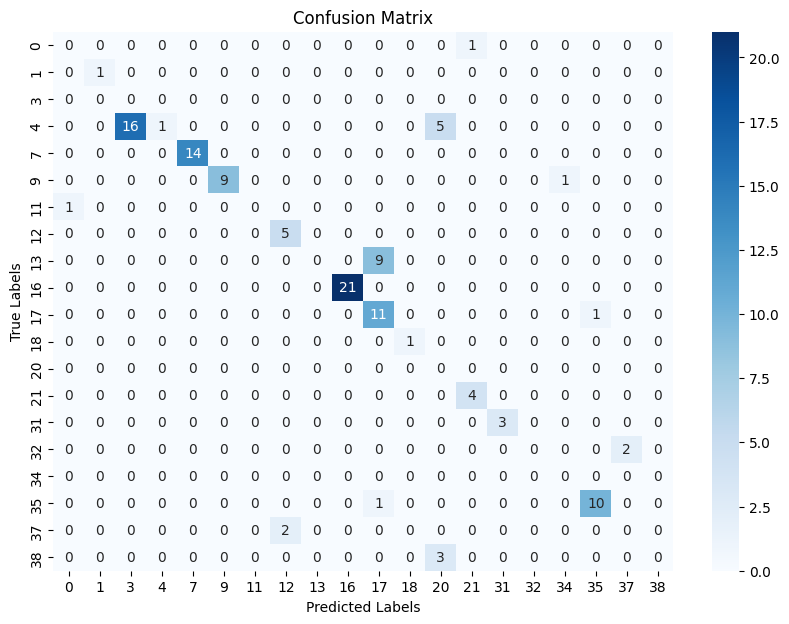

In [3]:
rf_classifier = joblib.load(model_filename)

# Load new data (example: assume `new_data.csv` has the same structure as `train_set.csv`)
new_data_file = "../datasets/test_set.csv"
new_df = pd.read_csv(new_data_file)

# Concatenate relevant text features
catFamily = new_df["Family"].fillna("*empty*")
catSubFamily = new_df["SubFamily"].fillna("*empty*")
catObjectGroup = new_df["ObjectGroup"].fillna("*empty*")
catObjectName = new_df["ObjectName"].fillna("*empty*")
catDescription = new_df["Description"].fillna("*empty*")
catTypeComments = new_df["Type Comments"].fillna("*empty*")
catStructuralMaterial = new_df["Structural Material"].fillna("*empty*")
catMaterial = new_df["Material"].fillna("*empty*")

new_df["Features"] = (
    catFamily
    + "|"
    + catSubFamily
    + "|"
    + catObjectGroup
    + "|"
    + catObjectName
    + "|"
    + catDescription
    + "|"
    + catTypeComments
    + "|"
    + catStructuralMaterial
    + "|"
    + catMaterial
)

# Vectorize text data using the same CountVectorizer instance
X_new_tfidf = vectorizer.transform(new_df["Features"])

# Predict using the loaded model
predictions_new = rf_classifier.predict(X_new_tfidf)

y_train_encoded = label_encoder.transform(new_df["Category"])

# Calculate accuracy
accuracy = accuracy_score(y_train_encoded, predictions_new)
print(f"Accuracy: {accuracy}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_train_encoded, predictions_new)

# Display classification report
print("\nClassification Report:")
class_report = classification_report(y_train_encoded, predictions_new)
print(class_report)

category_names = []
lines = class_report.splitlines()
for line in lines[2:-4]:  # Skip header and footer lines
    category_name = line.strip().split("       ")[0]
    category_names.append(category_name)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=category_names,
    yticklabels=category_names,  # Use the model's class labels
)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()